In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)


In [4]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [5]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
df.shape

(1987, 10)

In [7]:
df.info() #No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [8]:
NUMERIC = ['Age', 'AnnualIncome', 'FamilyMembers']
CATEGORICAL = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
TARGET = 'TravelInsurance'

In [9]:
# Ratio of target
ratio = df[TARGET].mean() #Imbalanced data with more 0; Only 35% of the data has travel insurance
ratio

0.3573225968797182

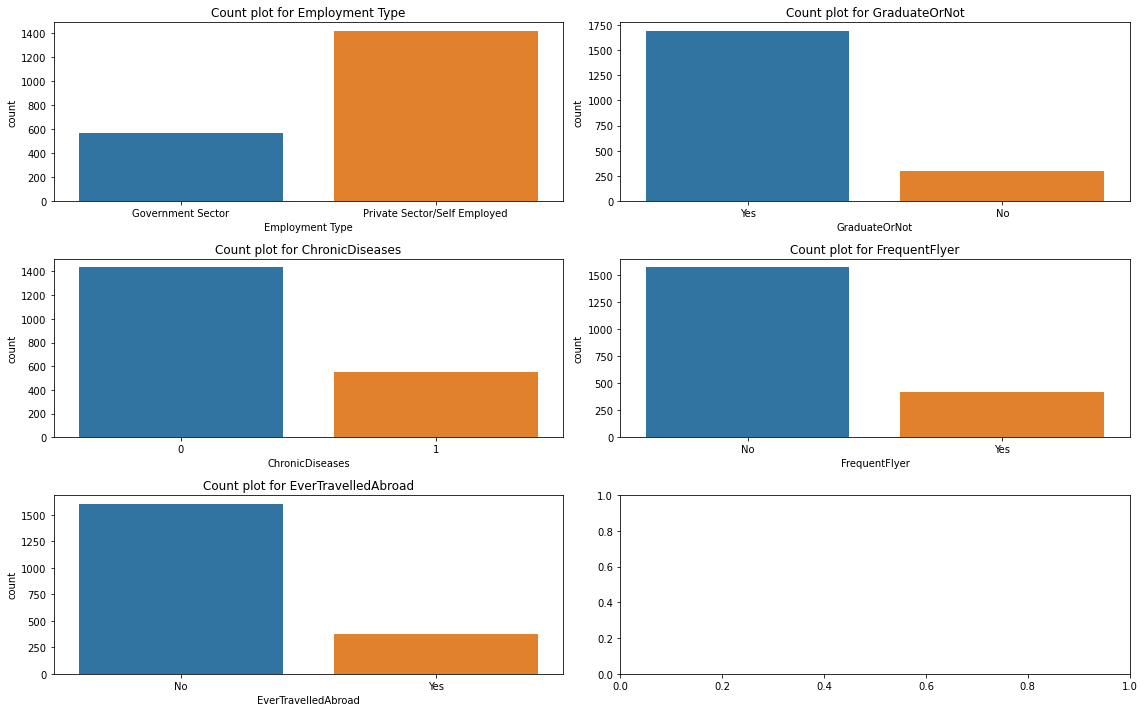

In [18]:
fig, axs = plt.subplots(3,2,figsize = (16,10), )
sns.countplot(data = df, x=CATEGORICAL[0], ax = axs[0,0])
axs[0,0].set_title(f'Count plot for {CATEGORICAL[0]}')
sns.countplot(data = df, x=CATEGORICAL[1], ax = axs[0,1])
axs[0,1].set_title(f'Count plot for {CATEGORICAL[1]}')
sns.countplot(data = df, x=CATEGORICAL[2], ax = axs[1,0])
axs[1,0].set_title(f'Count plot for {CATEGORICAL[2]}')
sns.countplot(data = df, x=CATEGORICAL[3], ax = axs[1,1])
axs[1,1].set_title(f'Count plot for {CATEGORICAL[3]}')
sns.countplot(data = df, x=CATEGORICAL[4], ax = axs[2,0])
axs[2,0].set_title(f'Count plot for {CATEGORICAL[4]}')
fig.tight_layout()
plt.show()
    

Text(0.5, 1.0, 'Count plot for FamilyMembers')

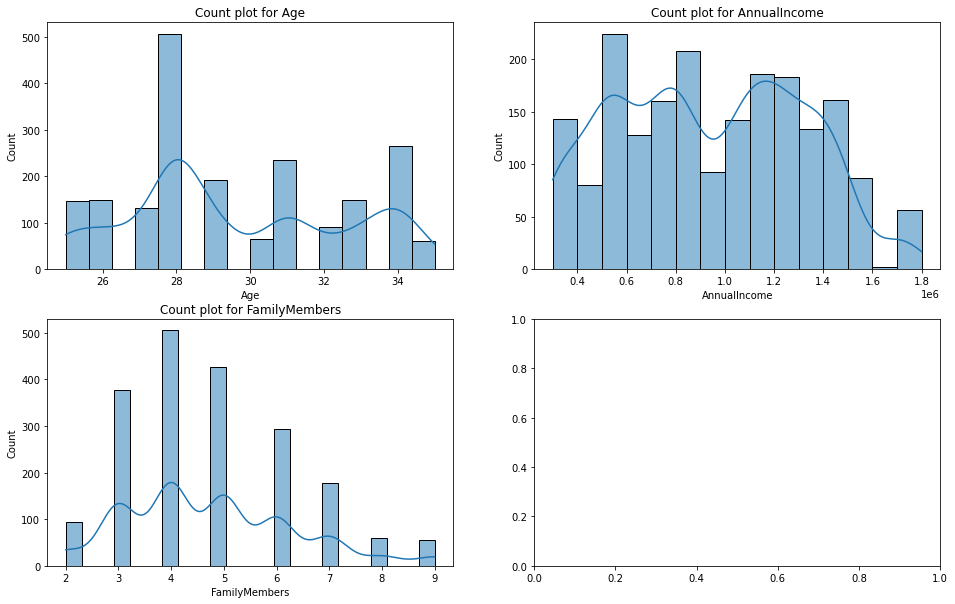

In [21]:
fig, axs = plt.subplots(2,2,figsize = (16,10))
sns.histplot(data = df, x=NUMERIC[0], kde=True, ax = axs[0,0])
axs[0,0].set_title(f'Count plot for {NUMERIC[0]}')
sns.histplot(data = df, x=NUMERIC[1],kde = True, ax = axs[0,1])
axs[0,1].set_title(f'Count plot for {NUMERIC[1]}')
sns.histplot(data = df, x=NUMERIC[2], kde=True, ax = axs[1,0])
axs[1,0].set_title(f'Count plot for {NUMERIC[2]}')


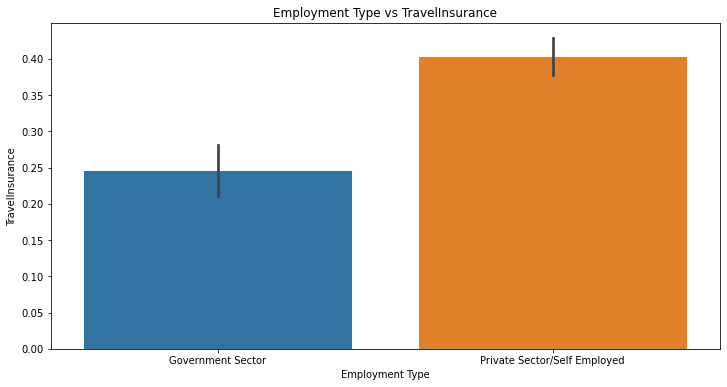

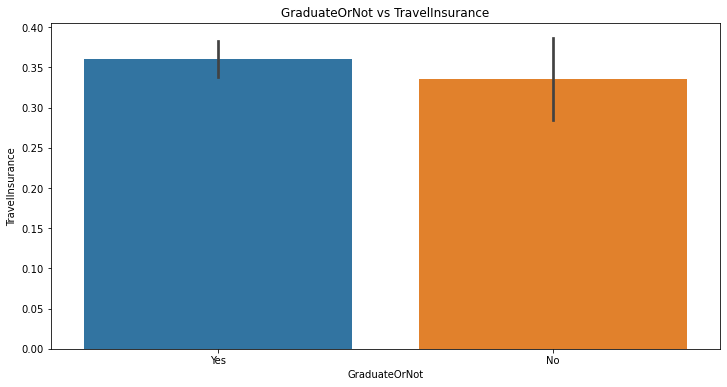

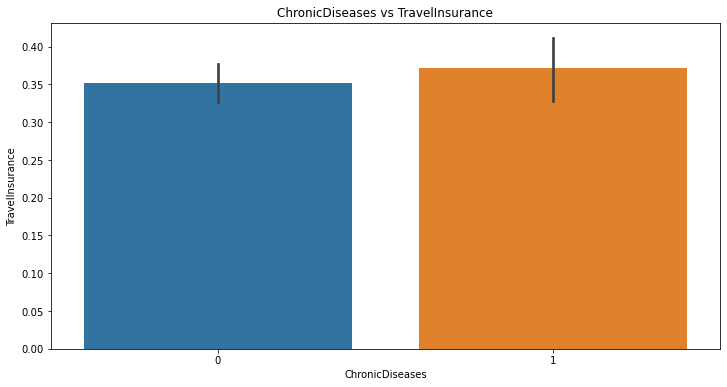

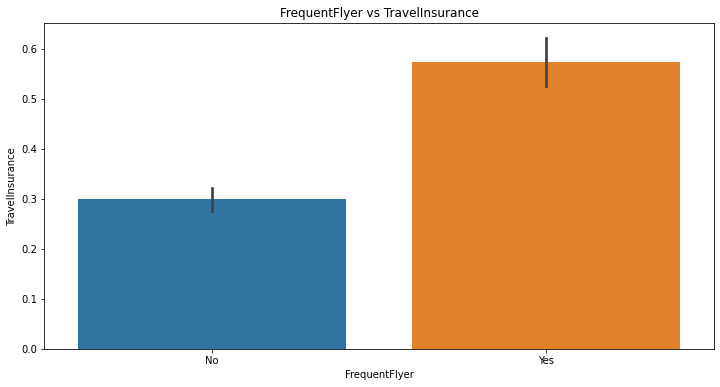

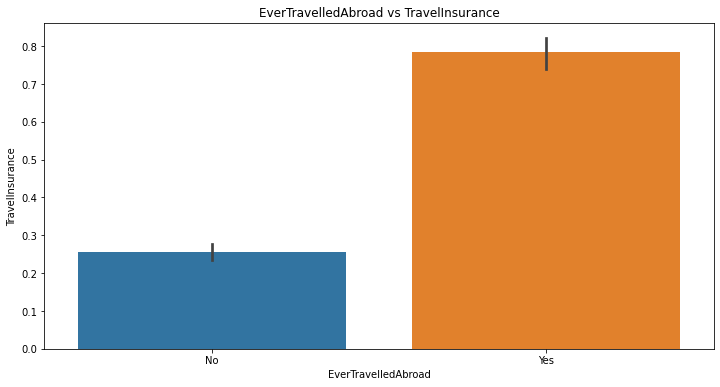

In [10]:
for c in CATEGORICAL:
    fig = plt.figure(figsize = (12,6))
    sns.barplot(data = df, x=c, y=TARGET)
    plt.title(f'{c} vs {TARGET}')
    plt.show()

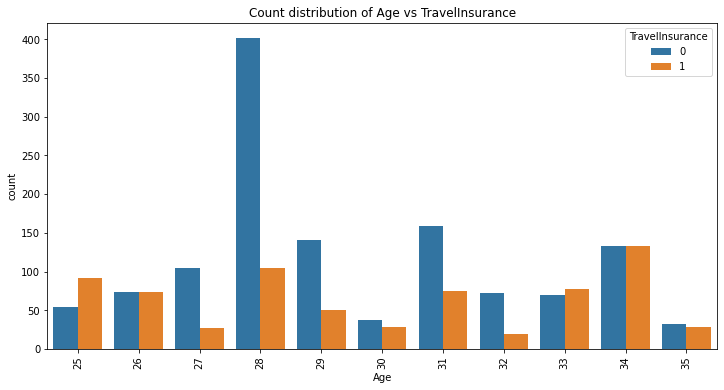

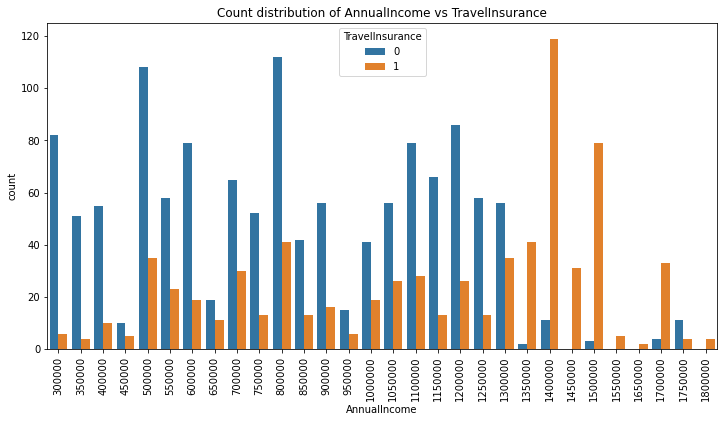

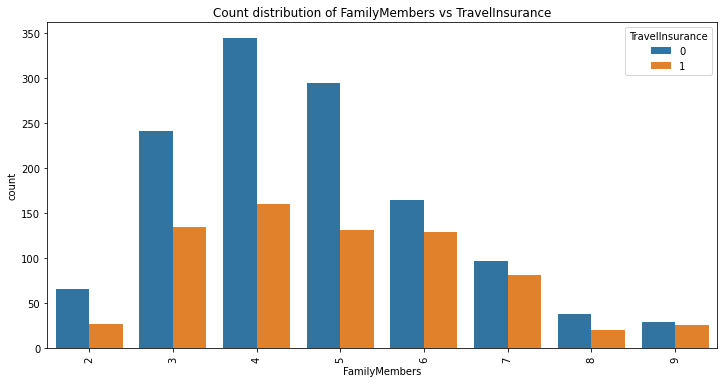

In [17]:
for c in NUMERIC:
    fig = plt.figure(figsize = (12,6))
    sns.countplot(x = c, data = df, hue = 'TravelInsurance')
    plt.xticks(rotation=90)
    plt.title(f'Count distribution of {c} vs {TARGET}')
    plt.show()

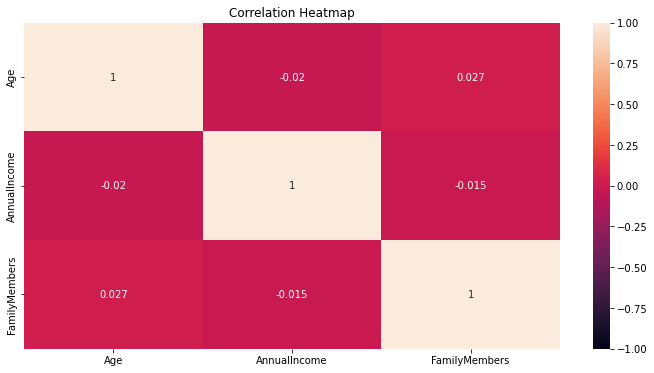

In [13]:
## No multicollinearity
df_num = df[NUMERIC]
df_corr = df_num.corr()
fig = plt.figure(figsize = (12,6))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap')
plt.show()